In [1]:
from qiskit import QuantumCircuit, assemble, Aer, execute
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.quantum_info import Statevector
from math import sqrt, pi
import numpy as np

Domyślnie jak robimy QuantumCircuit wszystkie kubity są w stanie |0>

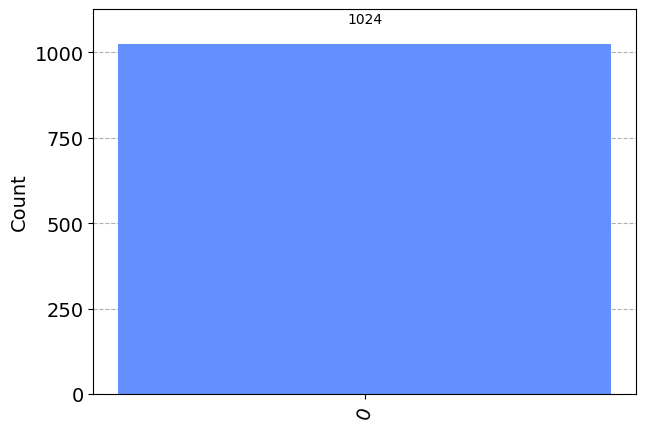

In [2]:
qc = QuantumCircuit(1,1)
qc.measure(0,0)

simulator = Aer.get_backend('aer_simulator') # Tell Qiskit how to simulate our circuit
result = simulator.run(qc).result()
counts = result.get_counts()
plot_histogram(counts)

Chcemy zainicjalizować układ w innym stanie początkowym - np. w superpozycji stanu 0 oraz 1

In [3]:
qc = QuantumCircuit(1,1) # create quantum circuit with one qubit and one classical bit
initial_state = [1,1]/np.sqrt(2) # define our initial state as |+> (change to [1,-1]/np.sqrt(2) for |->)
qc.initialize(initial_state, 0) # add initialization operation to qubit 0
qc.measure(0,0) # measure qubit 0 and store the results in classical bit 0
qc.draw()  # Let's view our circuit circuit.draw()

┌─────────────────────────────┐┌─┐
  q: ┤ Initialize(0.70711,0.70711) ├┤M├
     └─────────────────────────────┘└╥┘
c: 1/════════════════════════════════╩═
                                     0

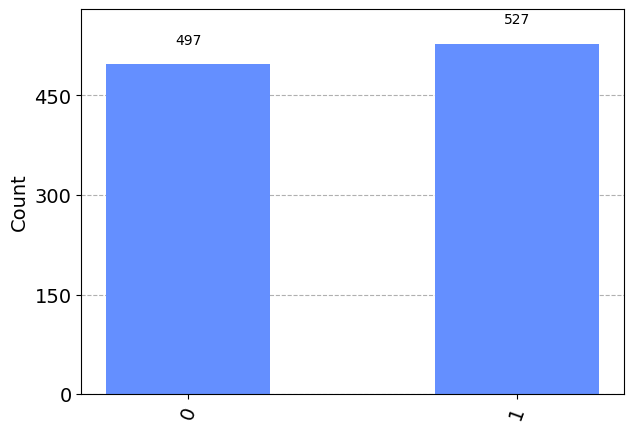

In [4]:
counts = execute(qc,simulator).result().get_counts() # Do the simulation, returning the counts
plot_histogram(counts) # Display the results in a histogram

Wyświetlanie/zapisywanie stanu podczas ewolucji
- użyjemy do tego klasy Statevector z modułu qiskit.quantum_info

In [5]:
qc = QuantumCircuit(2)
st0 = Statevector.from_instruction(qc) 
qc.h(0)
st1 = Statevector.from_instruction(qc)
qc.cnot(0, 1)
st2 = Statevector.from_instruction(qc)


print(st0)
print(st1)
array_to_latex(st2)

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))
Statevector([0.70710678+0.j, 0.70710678+0.j, 0.        +0.j,
             0.        +0.j],
            dims=(2, 2))


<IPython.core.display.Latex object>

**Ćwiczenie**:
1. Create a state vector that will give a 1/3 probability of measuring |0⟩.
2. Create a different state vector that will give the same measurement probabilities.
3. Verify that the probability of measuring |1⟩ for these two states is 2/3 (analytically).
4. Implement the states in qiskit and verify whether the histograms confirm your predictions.

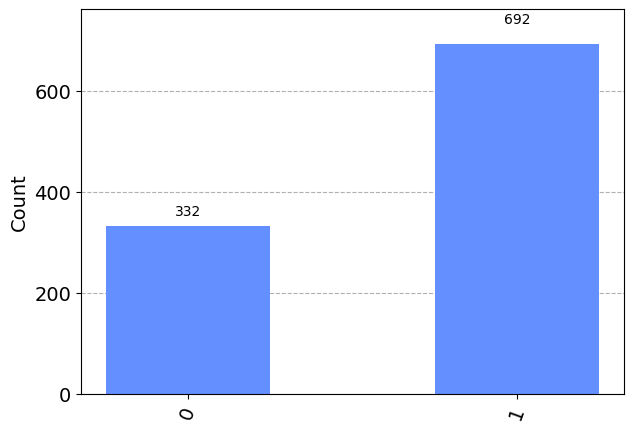

In [6]:
first_state = [1/sqrt(3), sqrt(2)/sqrt(3)]  # Define state |q_0>
second_state = [1j/sqrt(3), sqrt(2)/sqrt(3)]  # Define state |q_0>

sim = Aer.get_backend('aer_simulator')  # Tell Qiskit how to simulate our circuit

qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(second_state, 0) # Apply initialisation operation to the 0th qubit

qc.measure_all()
result = sim.run(qc).result() # Do the simulation and return the result

counts = result.get_counts()
plot_histogram(counts)